<a href="https://colab.research.google.com/github/ViswaNarahari/Nutritional-Deficiency-Analysis-by-Age-Group/blob/main/Nutritional_Deficiency_Analysis_by_Age_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Sample Data Head ---
   Person_ID  Age  Gender   Vitamin_A  Vitamin_D       Iron     Calcium  \
0          1   51    Male      Normal  Deficient  Deficient  Borderline   
1          2   14  Female      Normal     Normal     Normal      Normal   
2          3   71  Female  Borderline     Normal  Deficient   Deficient   
3          4   60    Male      Normal     Normal  Deficient      Normal   
4          5   20  Female      Normal  Deficient     Normal      Normal   

        Zinc        B12  
0  Deficient     Normal  
1  Deficient  Deficient  
2  Deficient     Normal  
3     Normal     Normal  
4     Normal  Deficient  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Person_ID  5000 non-null   int64 
 1   Age        5000 non-null   int64 
 2   Gender     5000 non-null   object
 3   Vitamin_A  5000 non-null   object
 4   Vita

/tmp/ipython-input-1-727827331.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def_counts = df.groupby('Age_Group')[nutrient].apply(lambda x: (x == 'Deficient').sum())
/tmp/ipython-input-1-727827331.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby('Age_Group').size()
/tmp/ipython-input-1-727827331.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def_counts = df.groupby('Age_Group

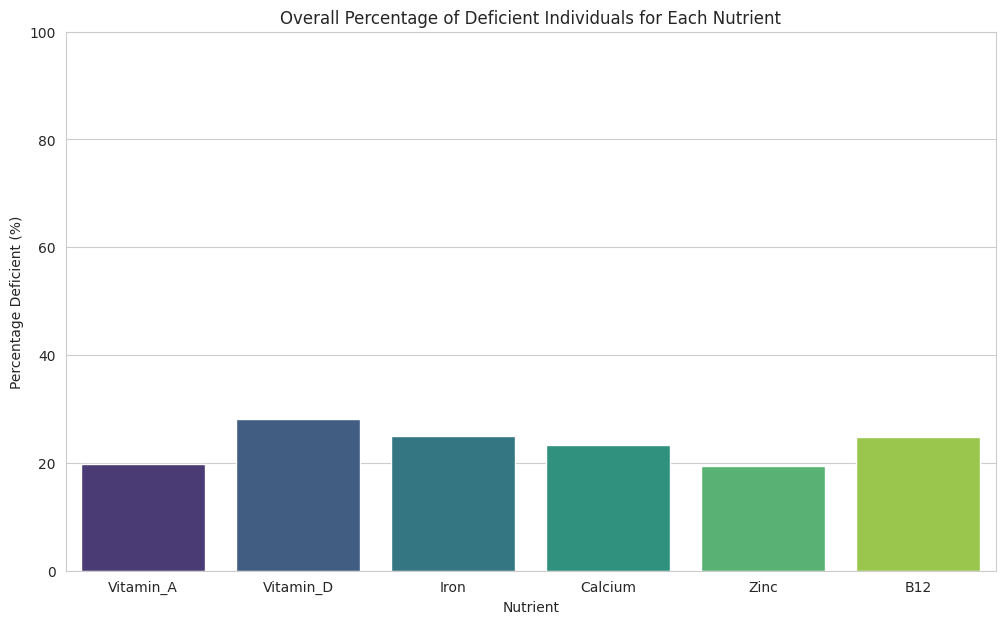

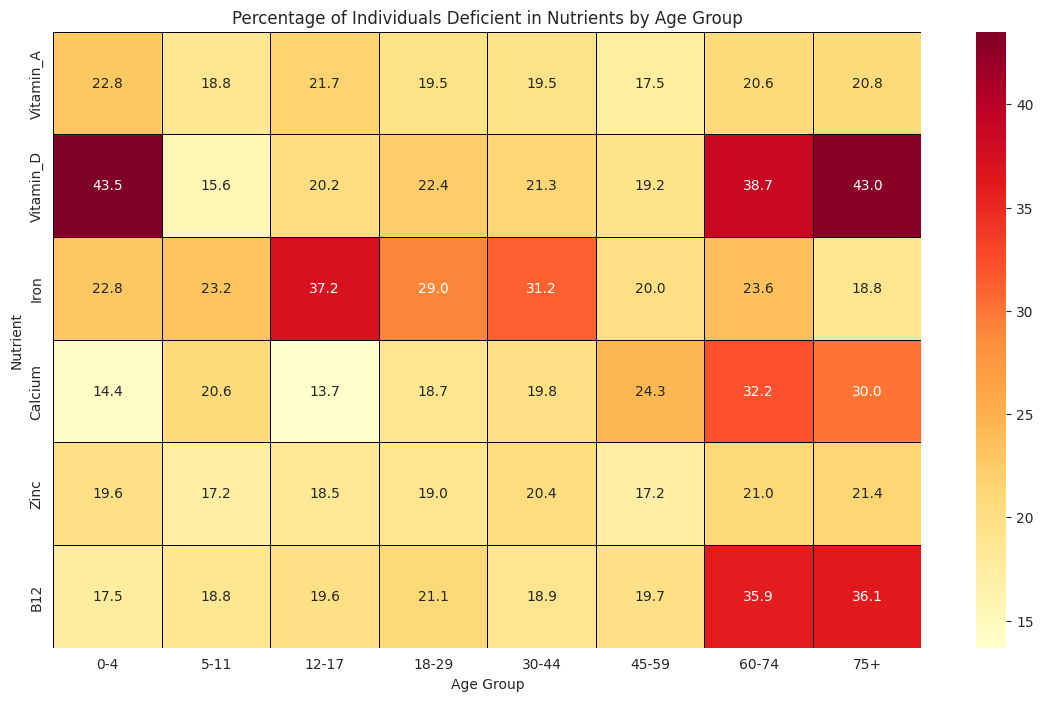

/tmp/ipython-input-1-727827331.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_distribution_1 = df.groupby(['Age_Group', nutrient_to_plot_1]).size().unstack(fill_value=0)


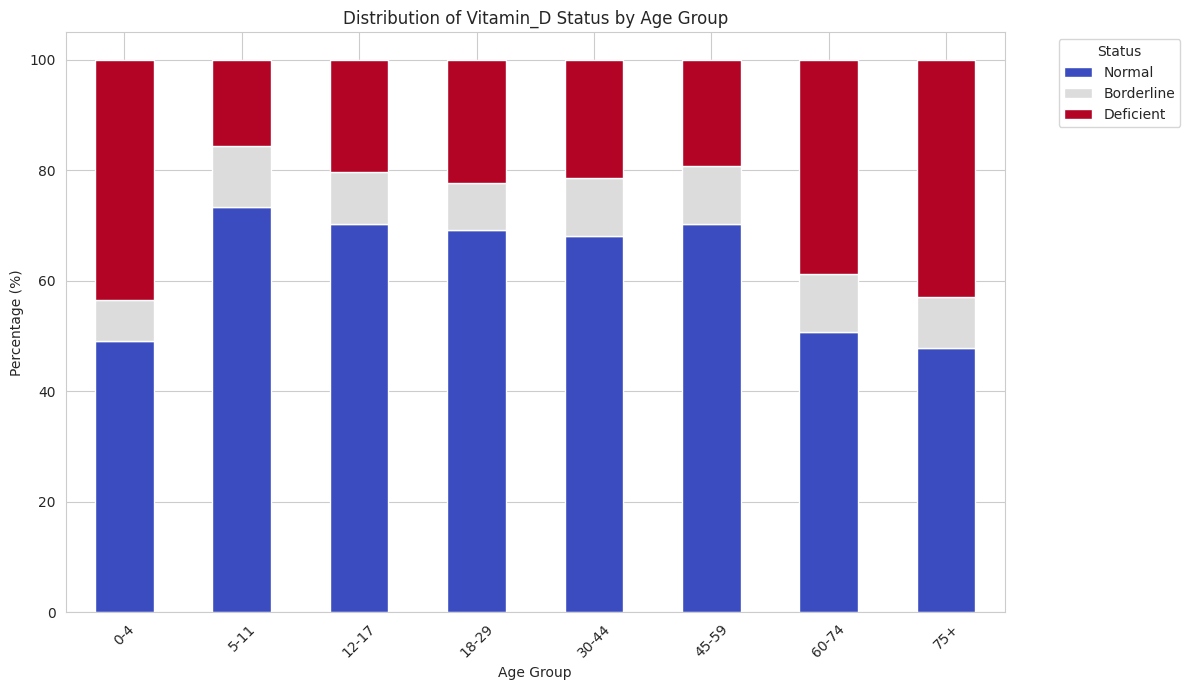

/tmp/ipython-input-1-727827331.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_distribution_2 = df.groupby(['Age_Group', nutrient_to_plot_2]).size().unstack(fill_value=0)


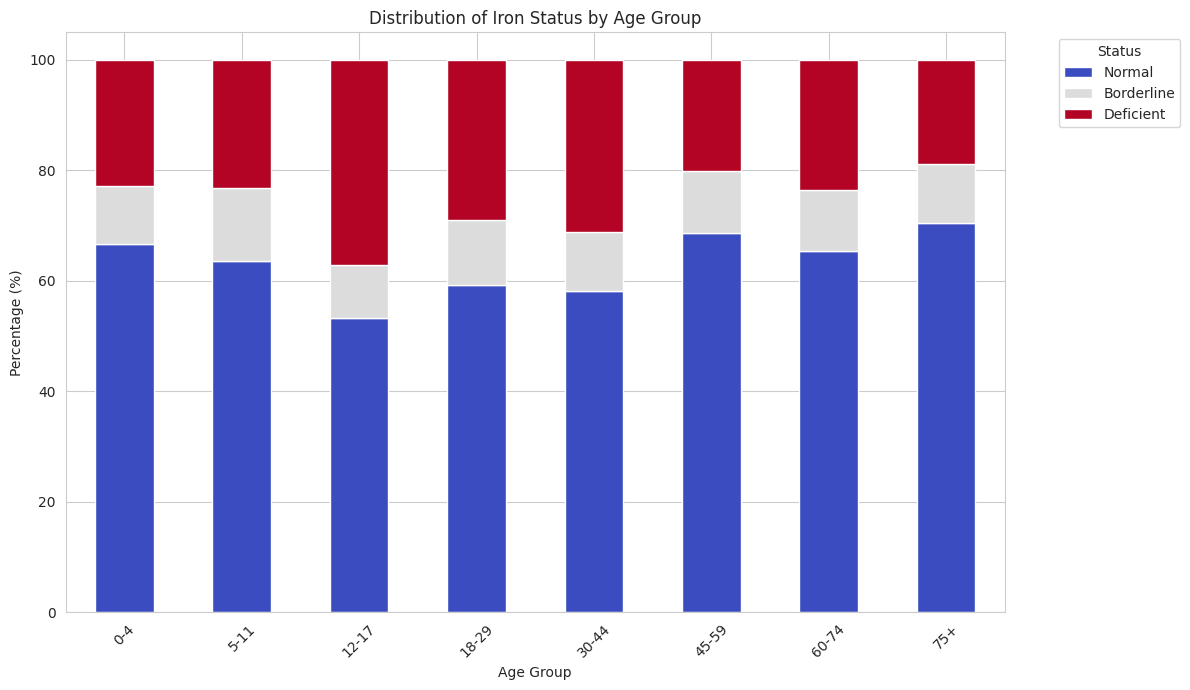

/tmp/ipython-input-1-727827331.py:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_distribution_3 = df.groupby(['Age_Group', nutrient_to_plot_3]).size().unstack(fill_value=0)


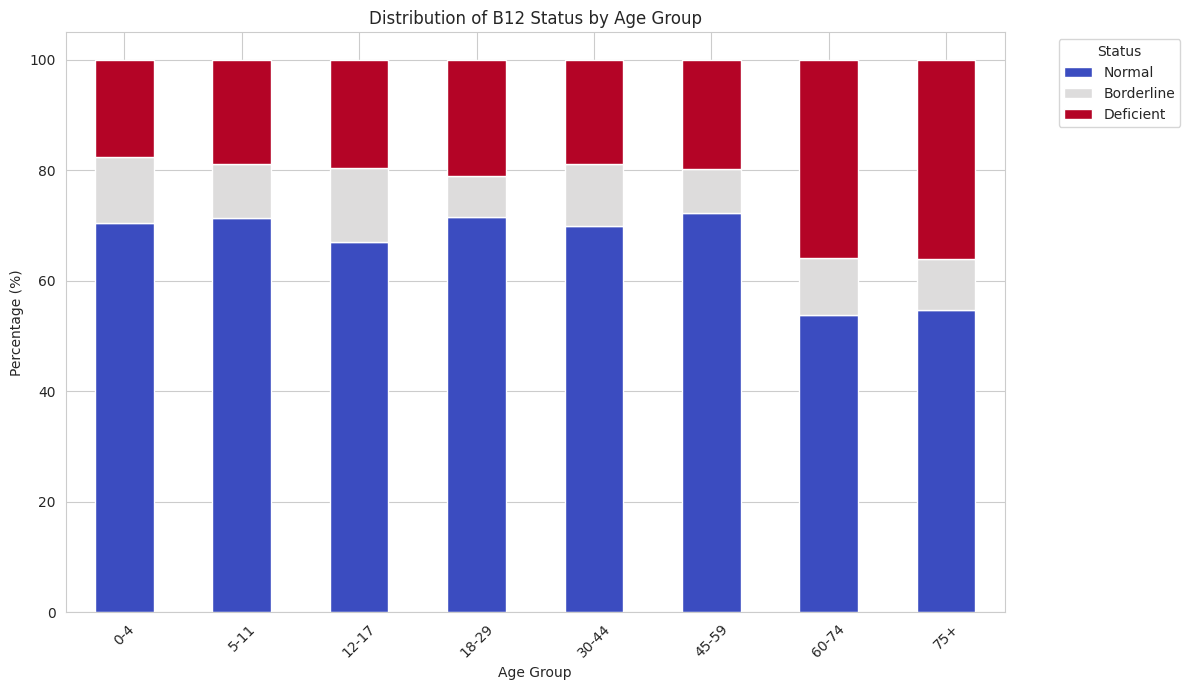

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# --- 1. Data Generation (Simulation) ---
# Number of records
num_records = 5000

# Generate ages
np.random.seed(42) # for reproducibility
ages = np.random.randint(0, 90, num_records)

# Simulate nutritional status
# Define possible statuses
status_options = ['Normal', 'Deficient', 'Borderline']
probabilities_base = [0.7, 0.2, 0.1] # Base probabilities

# Create a dictionary to hold the data
data = {
    'Person_ID': range(1, num_records + 1),
    'Age': ages,
    'Gender': np.random.choice(['Male', 'Female', 'Other'], num_records, p=[0.48, 0.50, 0.02]),
}

# Nutritional deficiencies - introduce some age-based trends
nutrients = ['Vitamin_A', 'Vitamin_D', 'Iron', 'Calcium', 'Zinc', 'B12']

for nutrient in nutrients:
    nutrient_status = []
    for age in ages:
        # Adjust probabilities based on age for some nutrients
        if nutrient == 'Vitamin_D':
            # Higher deficiency in older adults and very young
            if age > 60 or age < 5:
                prob = [0.5, 0.4, 0.1] # Higher deficiency probability
            else:
                prob = probabilities_base
        elif nutrient == 'Iron':
            # Higher deficiency in younger adults (e.g., menstruating women, rapid growth)
            if age >= 12 and age <= 45:
                prob = [0.6, 0.3, 0.1] # Higher deficiency probability
            else:
                prob = probabilities_base
        elif nutrient == 'Calcium':
            # Higher deficiency in older adults
            if age > 50:
                prob = [0.6, 0.3, 0.1]
            else:
                prob = probabilities_base
        elif nutrient == 'B12':
            # Higher deficiency in older adults (absorption issues) and potentially vegans (if Diet_Type was used)
            if age > 60:
                prob = [0.55, 0.35, 0.1]
            else:
                prob = probabilities_base
        else:
            prob = probabilities_base

        nutrient_status.append(np.random.choice(status_options, p=prob))
    data[nutrient] = nutrient_status

df = pd.DataFrame(data)
print("--- Sample Data Head ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

# --- 2. Data Preprocessing and Grouping ---

# Define age bins and labels
age_bins = [0, 5, 12, 18, 30, 45, 60, 75, 90]
age_labels = ['0-4', '5-11', '12-17', '18-29', '30-44', '45-59', '60-74', '75+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

# Map deficiency status to a numerical scale for analysis
# 0: Normal, 1: Borderline, 2: Deficient (higher value means worse status)
status_map = {'Normal': 0, 'Borderline': 1, 'Deficient': 2}
for nutrient in nutrients:
    df[f'{nutrient}_Score'] = df[nutrient].map(status_map)

print("\n--- Data with Age Groups and Deficiency Scores (Head) ---")
print(df.head())

# --- 3. Exploratory Data Analysis (EDA) ---

# Overall deficiency rates
print("\n--- Overall Deficiency Prevalence ---")
for nutrient in nutrients:
    deficiency_count = df[df[nutrient] == 'Deficient'].shape[0]
    total_count = df.shape[0]
    print(f"- {nutrient}: {deficiency_count / total_count:.2%} Deficient")

# Analyze deficiency by age group
print("\n--- Deficiency Rates by Age Group (%) ---")
deficiency_by_age = pd.DataFrame()

for nutrient in nutrients:
    def_counts = df.groupby('Age_Group')[nutrient].apply(lambda x: (x == 'Deficient').sum())
    total_counts = df.groupby('Age_Group').size()
    deficiency_by_age[nutrient] = def_counts / total_counts * 100 # Percentage

print(deficiency_by_age.round(2))

# --- Visualizations ---

# 1. Bar plot of overall deficiency percentages
plt.figure(figsize=(12, 7))
overall_def_percentage = {}
for nutrient in nutrients:
    overall_def_percentage[nutrient] = (df[df[nutrient] == 'Deficient'].shape[0] / df.shape[0]) * 100
sns.barplot(x=list(overall_def_percentage.keys()), y=list(overall_def_percentage.values()), palette='viridis')
plt.title('Overall Percentage of Deficient Individuals for Each Nutrient')
plt.ylabel('Percentage Deficient (%)')
plt.xlabel('Nutrient')
plt.ylim(0, 100)
plt.show()

# 2. Heatmap of deficiency percentage by age group
plt.figure(figsize=(14, 8))
sns.heatmap(deficiency_by_age.T, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5, linecolor='black')
plt.title('Percentage of Individuals Deficient in Nutrients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Nutrient')
plt.show()

# 3. Stacked bar chart for Vitamin D across age groups (showing Normal, Borderline, Deficient distribution)
nutrient_to_plot_1 = 'Vitamin_D'
status_distribution_1 = df.groupby(['Age_Group', nutrient_to_plot_1]).size().unstack(fill_value=0)
status_distribution_percent_1 = status_distribution_1.apply(lambda x: x / x.sum() * 100, axis=1)
status_distribution_percent_1 = status_distribution_percent_1[['Normal', 'Borderline', 'Deficient']] # Reorder columns

status_distribution_percent_1.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title(f'Distribution of {nutrient_to_plot_1} Status by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Stacked bar chart for Iron across age groups (showing Normal, Borderline, Deficient distribution)
nutrient_to_plot_2 = 'Iron'
status_distribution_2 = df.groupby(['Age_Group', nutrient_to_plot_2]).size().unstack(fill_value=0)
status_distribution_percent_2 = status_distribution_2.apply(lambda x: x / x.sum() * 100, axis=1)
status_distribution_percent_2 = status_distribution_percent_2[['Normal', 'Borderline', 'Deficient']] # Reorder columns

status_distribution_percent_2.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title(f'Distribution of {nutrient_to_plot_2} Status by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Stacked bar chart for B12 across age groups (showing Normal, Borderline, Deficient distribution)
nutrient_to_plot_3 = 'B12'
status_distribution_3 = df.groupby(['Age_Group', nutrient_to_plot_3]).size().unstack(fill_value=0)
status_distribution_percent_3 = status_distribution_3.apply(lambda x: x / x.sum() * 100, axis=1)
status_distribution_percent_3 = status_distribution_percent_3[['Normal', 'Borderline', 'Deficient']] # Reorder columns

status_distribution_percent_3.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title(f'Distribution of {nutrient_to_plot_3} Status by Age Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()